<a href="https://colab.research.google.com/github/DipuSharma/Data_Science_Project/blob/main/CNN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Fashion Classification (CNN)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
from tensorflow import keras

In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
class_label = ["T-Shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandel", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

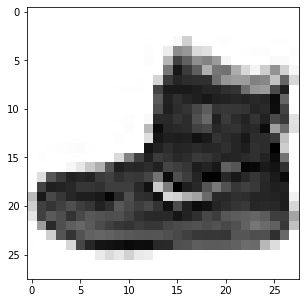

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(X_train[0], cmap="Greys")
plt.show()

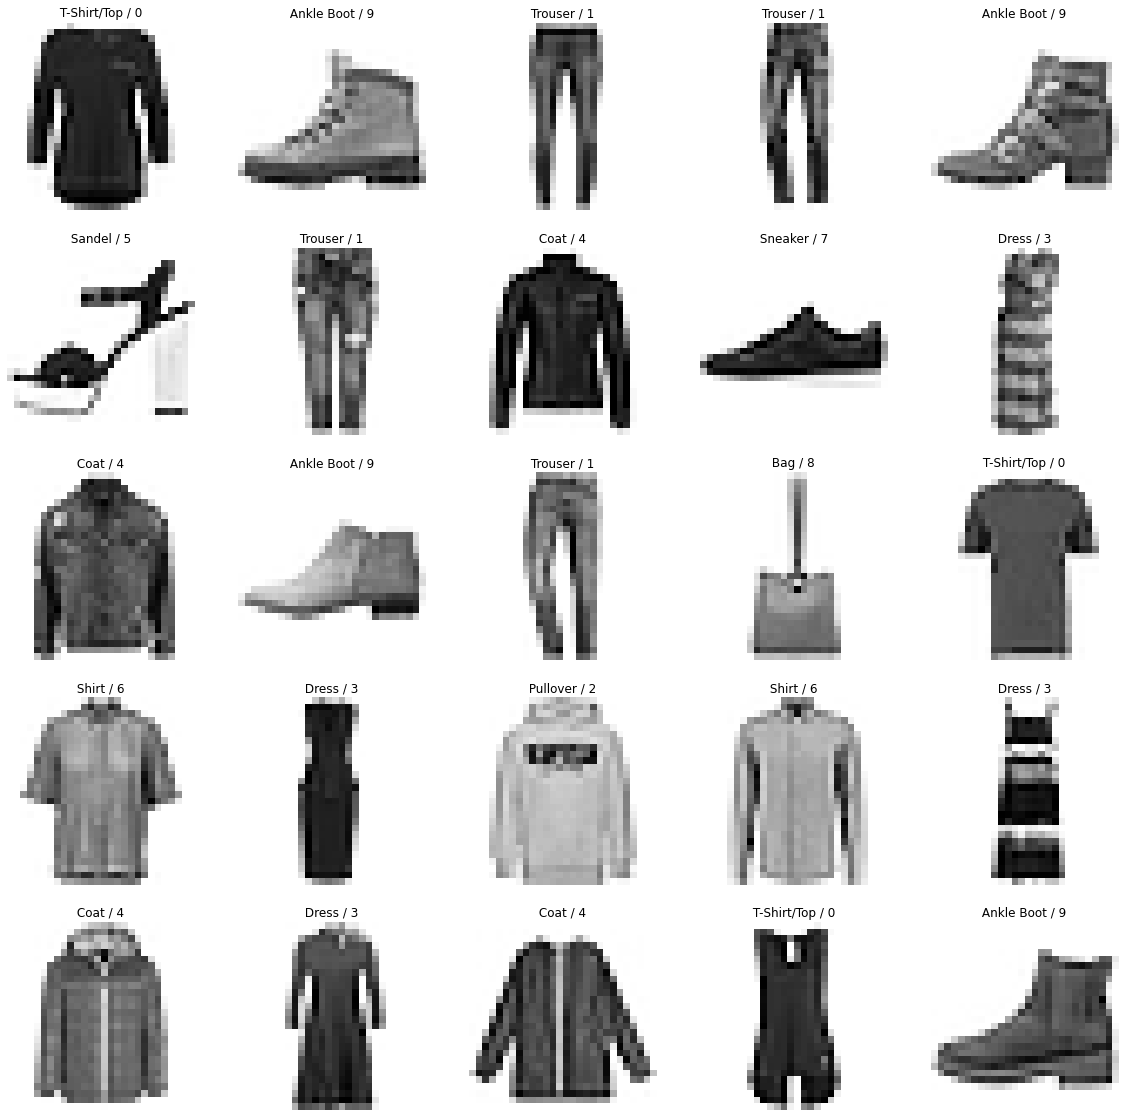

In [ ]:
plt.figure(figsize=(20,20))
j = 1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5, 5 ,j); j+= 1
  plt.imshow(X_train[i], cmap="Greys")
  plt.axis('off')
  plt.title(" {} / {} ".format(class_label[y_train[i]], y_train[i]))
plt.show()

In [ ]:
X_train.ndim

3

## Change Dimension

In [ ]:
##  Create 4 Dim Array
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [ ]:
X_train.ndim

4

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
## Feature Scalling

X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=0.2, random_state= 2020) 

In [ ]:
X_train.shape, y_train.shape

((48000, 28, 28, 1), (48000,))

In [ ]:
X_val.shape, y_val.shape

((12000, 28, 28, 1), (12000,))

In [ ]:
## Convolutional Neural Network

model = keras.models.Sequential([keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='valid', activation='relu', input_shape=[28, 28, 1]),
                         keras.layers.MaxPooling2D(pool_size=(2, 2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax') 
                         ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
y_train.shape

(48000,)

In [ ]:
model.fit(X_train, y_train, batch_size=512, epochs=10, verbose=1, validation_data=(X_val, y_val))
# model.fit(X_train, y_train)

Epoch 1/10
94/94 [==============================] - 1s 14ms/step - loss: 0.2128 - accuracy: 0.9242 - val_loss: 0.2835 - val_accuracy: 0.9018
Epoch 2/10
94/94 [==============================] - 1s 13ms/step - loss: 0.2044 - accuracy: 0.9261 - val_loss: 0.2648 - val_accuracy: 0.9088
Epoch 3/10
94/94 [==============================] - 1s 10ms/step - loss: 0.1946 - accuracy: 0.9300 - val_loss: 0.2641 - val_accuracy: 0.9100
Epoch 4/10
94/94 [==============================] - 1s 9ms/step - loss: 0.1891 - accuracy: 0.9321 - val_loss: 0.2645 - val_accuracy: 0.9078
Epoch 5/10
94/94 [==============================] - 1s 9ms/step - loss: 0.1791 - accuracy: 0.9361 - val_loss: 0.2554 - val_accuracy: 0.9128
Epoch 6/10
94/94 [==============================] - 1s 9ms/step - loss: 0.1765 - accuracy: 0.9367 - val_loss: 0.2622 - val_accuracy: 0.9086
Epoch 7/10
94/94 [==============================] - 1s 9ms/step - loss: 0.1638 - accuracy: 0.9411 - val_loss: 0.2599 - val_accuracy: 0.9094
Epoch 8/10
94/94 

## Test Model

In [ ]:
model.predict(np.expand_dims(X_val[0], axis=0)).round(2)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
np.argmax(model.predict(np.expand_dims(X_val[0], axis=0)).round(2))

0

In [ ]:
y_val[0]

0

In [ ]:
pred = model.predict(X_test).round(2)
pred

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.2 , 0.01, 0.  ]], dtype=float32)

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2772 - accuracy: 0.9074


[0.2771926820278168, 0.9074000120162964]

## Visualize Model

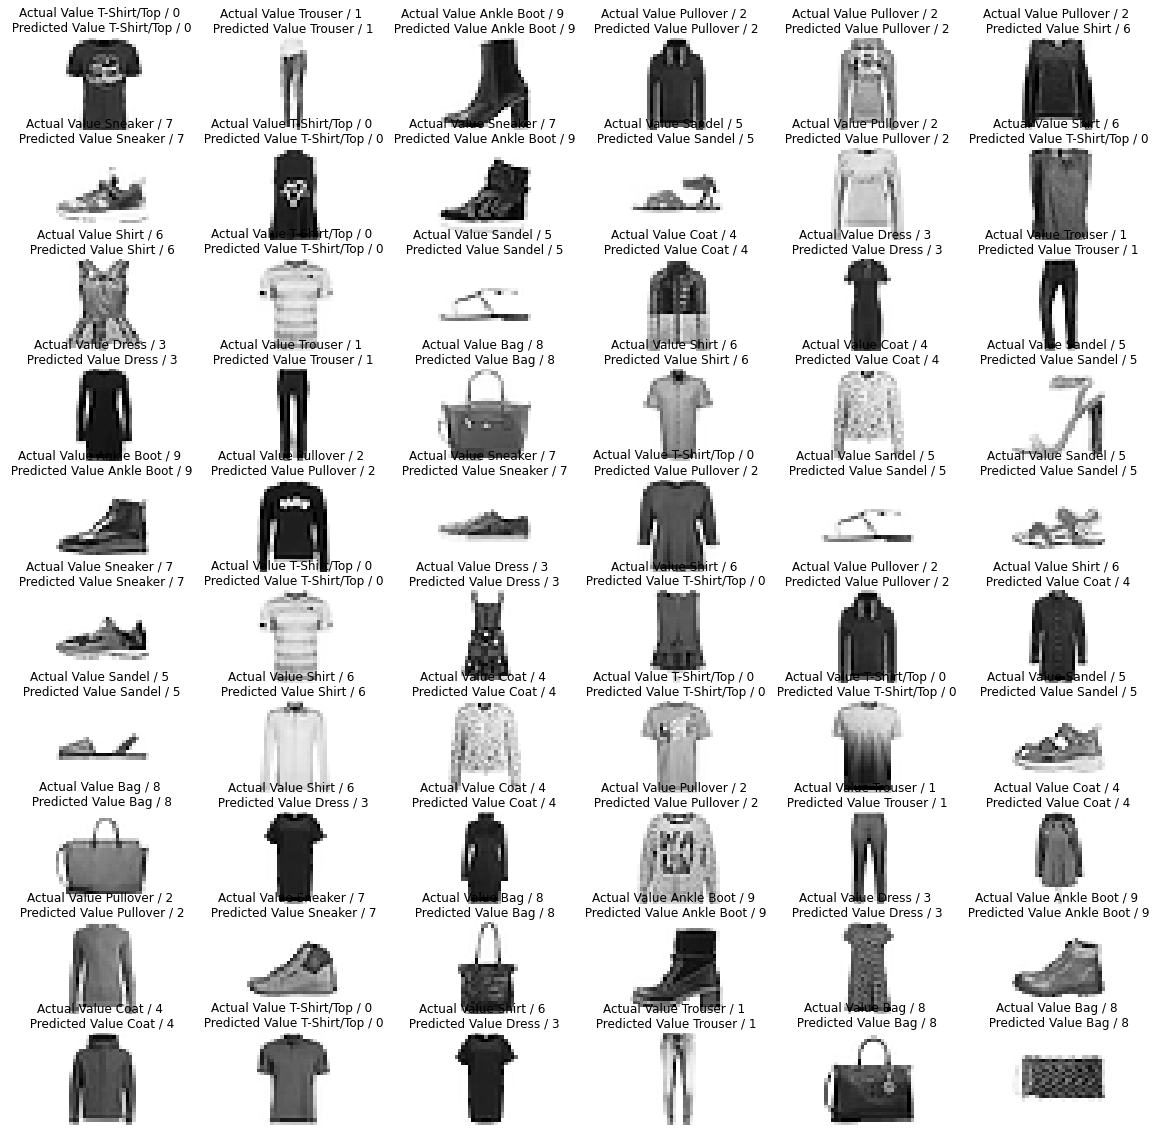

In [ ]:
plt.figure(figsize=(20,20))
j = 1
for i in np.random.randint(0, 1000, 60):
  plt.subplot(10, 6 ,j); j+= 1
  plt.imshow(X_test[i].reshape(28, 28), cmap="Greys")
  plt.axis('off')
  plt.title("Actual Value {} / {} \n Predicted Value {} / {} ".format(class_label[y_test[i]], y_test[i], class_label[np.argmax(pred[i])],np.argmax(pred[i])))